In [1]:
import pandas as pd
data = pd.read_csv('Dataset11-Weather-Data.csv')
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
data.isnull().sum()
data = data.dropna()  # Example: Remove rows with missing values

In [7]:
print(data.columns)


Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')


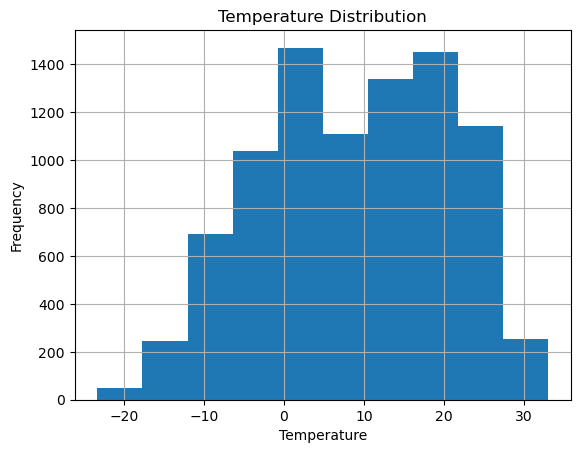

In [15]:
import matplotlib.pyplot as plt

# Assuming the correct column name is 'Temp'
data['Temp_C'].hist()
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()



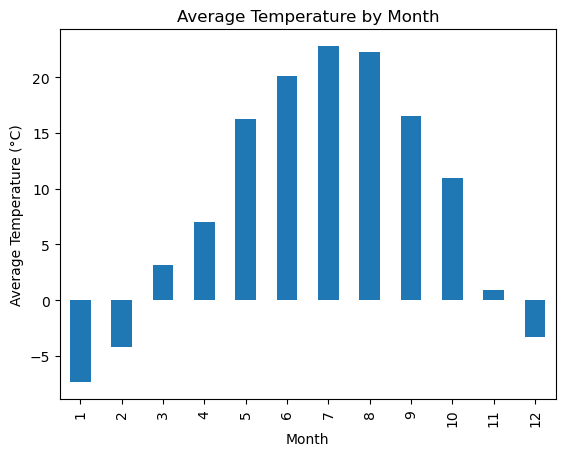

In [19]:
import matplotlib.pyplot as plt

# Assuming you have a 'Month' column and 'Temp_C' column
data['Month'] = pd.to_datetime(data['Date/Time']).dt.month  # Extract month from date
avg_temp_by_month = data.groupby('Month')['Temp_C'].mean()

avg_temp_by_month.plot(kind='bar')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.show()



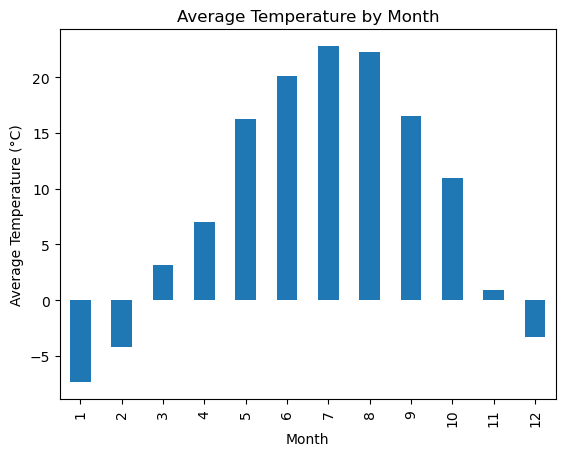

In [21]:
import matplotlib.pyplot as plt

# Assuming you have a 'Month' column and 'Temp_C' column
data['Month'] = pd.to_datetime(data['Date/Time']).dt.month  # Extract month from date
avg_temp_by_month = data.groupby('Month')['Temp_C'].mean()

avg_temp_by_month.plot(kind='bar')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.show()


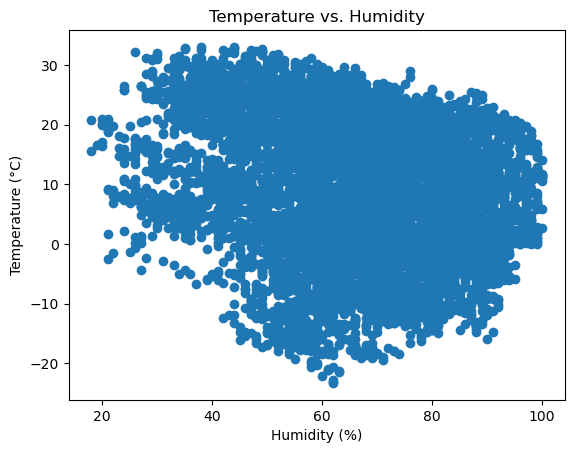

In [25]:
# Scatter plot to show relationship between temperature and humidity
plt.scatter(data['Rel Hum_%'], data['Temp_C'])
plt.title('Temperature vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.show()


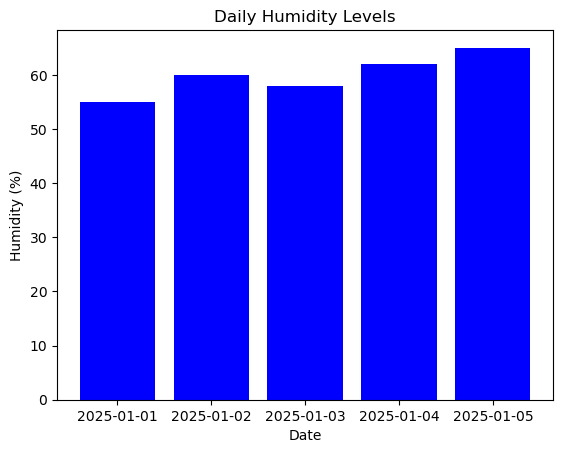

In [43]:
import matplotlib.pyplot as plt

# Sample data: dates and corresponding humidity values
dates = ['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04', '2025-01-05']
humidity = [55, 60, 58, 62, 65]

# Create the bar graph
plt.bar(dates, humidity, color='blue')

# Add titles and labels
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.title('Daily Humidity Levels')

# Display the graph
plt.show()


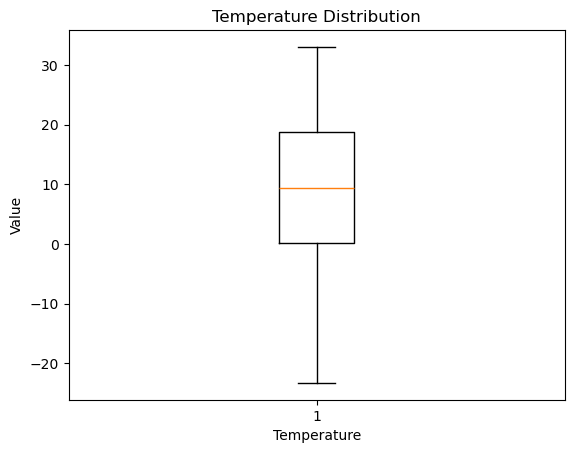

In [27]:
# Box plot to show the distribution of temperature
plt.boxplot(data['Temp_C'])
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Value')
plt.show()

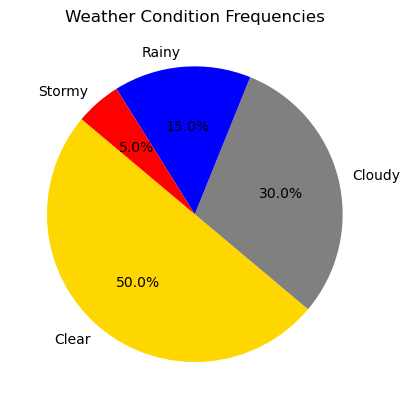

In [55]:
import matplotlib.pyplot as plt

# Sample data: weather condition frequencies
conditions = ['Clear', 'Cloudy', 'Rainy', 'Stormy']
frequencies = [50, 30, 15, 5]  # Example frequencies

# Create the pie chart
plt.pie(frequencies, labels=conditions, autopct='%1.1f%%', colors=['gold', 'gray', 'blue', 'red'], startangle=140)

# Add a title
plt.title('Weather Condition Frequencies')

# Display the chart
plt.show()


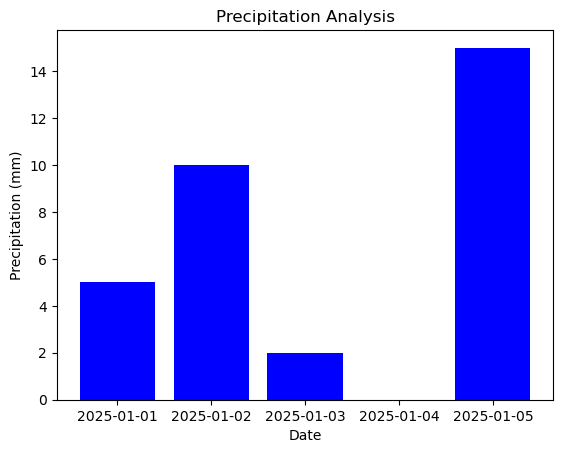

In [53]:
import matplotlib.pyplot as plt

# Sample data: dates and total precipitation recorded
dates = ['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04', '2025-01-05']
precipitation = [5, 10, 2, 0, 15]  # Example precipitation values (in mm)

# Create the bar graph
plt.bar(dates, precipitation, color='blue')

# Add titles and labels
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation Analysis')

# Display the graph
plt.show()


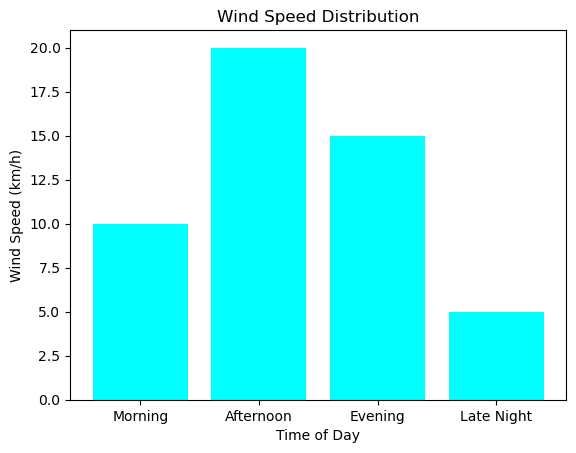

In [45]:
import matplotlib.pyplot as plt

# Sample data: wind speed recorded at different times of the day
times_of_day = ['Morning', 'Afternoon', 'Evening', 'Late Night']
wind_speed = [10, 20, 15, 5]  # Example wind speed values

# Create the bar graph
plt.bar(times_of_day, wind_speed, color='cyan')

# Add titles and labels
plt.xlabel('Time of Day')
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed Distribution')

# Display the graph
plt.show()


In [29]:
pip install dash pandas

Note: you may need to restart the kernel to use updated packages.


In [37]:
data = pd.read_csv('Dataset11-Weather-Data.csv')
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data['Month'] = data['Date/Time'].dt.month


In [41]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

# Load the dataset
data = pd.read_csv('Dataset11-Weather-Data.csv')

# Ensure correct datetime conversion
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data['Month'] = data['Date/Time'].dt.month

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div(children=[
    html.H1(children='Weather Report Analysis'),

    dcc.Graph(
        id='histogram',
        figure=px.histogram(data, x='Temp_C', title='Temperature Distribution')
    ),

    dcc.Graph(
        id='bargraph',
        figure=px.bar(data.groupby('Month')['Temp_C'].mean().reset_index(), x='Month', y='Temp_C', title='Average Temperature by Month')
    ),

    dcc.Graph(
        id='linegraph',
        figure=px.line(data, x='Date/Time', y='Temp_C', title='Temperature Over Time')
    ),

    dcc.Graph(
        id='scatterplot',
        figure=px.scatter(data, x='Rel Hum_%', y='Temp_C', title='Temperature vs. Humidity')
    ),

    dcc.Graph(
        id='boxplot',
        figure=px.box(data, y='Temp_C', title='Temperature Distribution')
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


  
